# Bins EDA (Guest Count)

Let's get a better understanding of the different `guest_count` bins.  

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bins = ['1', '2', '3-5', '6+']

In [3]:
data_map = {
    "hockey"    : "../data/hockey_3_text_processed.csv",
    "valentine" : "../data/valentine_3_text_processed.csv",
    "silvester" : "../data/silvester_3_text_processed.csv"
}

In [4]:
df = {}
for table in data_map.keys():
    df[table] = pd.read_csv(data_map[table])

df = pd.concat([df[table] for table in data_map.keys()])

In [5]:
df.head()

,bar_id,order_id,order_time,order_time_closed,order_item_time,order_item_id,item_qty,sales_before_tax,sales_inc_tax,guest_count,...,first_to_second_order,avg_time_between_steps,sit_to_order,max_items_per_step,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,total_sales_before_tax,total_sales_inc_tax
0,1177,520008106,2019-04-16 12:01:00,2019-04-16 13:15:52,2019-04-16 12:13:26,52000810601,1.0,2.97,3.425081,1,...,0,13.00,13,2,1.0,1.0,1.0,0.0,19.84,22.88
1,1177,520008106,2019-04-16 12:01:00,2019-04-16 13:15:52,2019-04-16 12:13:26,52000810600,1.0,16.87,19.454919,1,...,0,13.00,13,2,1.0,1.0,1.0,0.0,19.84,22.88
2,1177,520008105,2019-04-16 12:01:00,2019-04-16 13:11:55,2019-04-16 12:18:25,52000810502,1.0,8.99,10.368399,1,...,4,8.50,13,1,2.0,0.0,1.0,0.0,26.61,30.69
3,1177,520008105,2019-04-16 12:01:00,2019-04-16 13:11:55,2019-04-16 12:13:26,52000810500,1.0,17.62,20.321601,1,...,4,8.50,13,1,2.0,0.0,1.0,0.0,26.61,30.69
4,1177,520253565,2019-04-16 19:35:00,2019-04-16 22:39:18,2019-04-16 20:56:13,52025356502,1.0,7.62,8.610000,0,...,40,32.25,1,1,0.0,0.0,0.0,0.0,30.48,34.44


Recall our features:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151862 entries, 0 to 445493
Data columns (total 50 columns):
bar_id                          1151862 non-null int64
order_id                        1151862 non-null int64
order_time                      1151862 non-null object
order_time_closed               1151862 non-null object
order_item_time                 1151862 non-null object
order_item_id                   1151862 non-null int64
item_qty                        1151862 non-null float64
sales_before_tax                1151862 non-null float64
sales_inc_tax                   1151862 non-null float64
guest_count                     1151862 non-null int64
title                           1151862 non-null object
category_id                     1151862 non-null float64
beer_brand_id                   1151862 non-null int64
beer_serving_type_id            1151862 non-null int64
beer_volume                     1151862 non-null float64
total_orders_category_id_1.0    1151862 non-null 

Create tables:

In [7]:
def shrink_orders_to_table(data):
    # use `min` wherever the feature is fixed for the entire table
    # use `max` for booleans (we take the value of True whenever there exists at least 1 truthy order_item of the feature)
    
    data = data.groupby("order_id", as_index=False).agg({
        "order_time": "min",
        "order_time_closed": "min",
        "order_hour": "min",
        "order_minute": "min",
        "order_close_hour": "min",
        "order_close_minute": "min",
        "period_of_day": "min",
        "order_day_of_week": "min",
        "is_weekend": "min",
        
        "item_qty": "sum",
        "beer_volume": "sum",
        "guest_count": "min",
        
        "total_orders_category_id_1.0": "min",
        "total_orders_category_id_2.0": "min",
        "total_orders_category_id_3.0": "min",
        "total_orders_category_id_4.0": "min",
        "total_orders_category_id_5.0": "min",
        "total_orders_category_id_6.0": "min",
        "total_orders": "min",
        "total_large_meals":"min",
        "total_small_meals":"min",
        "total_large_sharable_meals":"min",
        "total_small_sharable_meals":"min",
        
        "sharable": "max",
        "kids_meal": "max",
        "birthday": "max",
        
        "dwell_time": "min",
        "meal_flow_last_to_close": "min",
        "total_flow_steps": "min",
        "total_meal_steps":"min",
        "avg_time_between_steps":"min",
        "sit_to_order":"min",
        "max_items_per_step":"min",
        
        "total_sales_before_tax": "min",
        "total_sales_inc_tax": "min"
    })
    
    data.set_index("order_id", inplace=True)
    return data

In [8]:
df = shrink_orders_to_table(df)

In [9]:
df.head()

,order_time,order_time_closed,order_hour,order_minute,order_close_hour,order_close_minute,period_of_day,order_day_of_week,is_weekend,item_qty,...,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,total_sales_inc_tax
order_id,,,,,,,,,,,,,,,,,,,,,
358724975,2018-12-23 00:00:00,2018-12-23 00:12:44,0,0,0,12,night,Sunday,True,6.0,...,0,0.212222,0,2,2,4.500000,1,2,46.78,52.86
358729589,2018-12-23 00:05:56,2018-12-23 00:25:08,0,5,0,25,night,Sunday,True,1.0,...,0,0.320000,4,4,1,1.000000,1,1,5.99,6.77
358740316,2018-12-23 00:01:23,2018-12-23 00:26:55,0,1,0,26,night,Sunday,True,8.0,...,0,0.425556,1,5,3,5.666667,1,3,51.48,58.17
358740319,2018-12-23 00:11:41,2018-12-23 00:26:35,0,11,0,26,night,Sunday,True,1.0,...,0,0.248333,2,3,1,5.000000,5,1,11.46,12.95
358741915,2018-12-23 00:32:07,2018-12-23 00:50:18,0,32,0,50,night,Sunday,True,1.0,...,0,0.303056,1,3,2,4.500000,1,2,22.00,24.86


Our table features are:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243755 entries, 358724975 to 527862021
Data columns (total 35 columns):
order_time                      243755 non-null object
order_time_closed               243755 non-null object
order_hour                      243755 non-null int64
order_minute                    243755 non-null int64
order_close_hour                243755 non-null int64
order_close_minute              243755 non-null int64
period_of_day                   243755 non-null object
order_day_of_week               243755 non-null object
is_weekend                      243755 non-null bool
item_qty                        243755 non-null float64
beer_volume                     243755 non-null float64
guest_count                     243755 non-null int64
total_orders_category_id_1.0    243755 non-null float64
total_orders_category_id_2.0    243755 non-null float64
total_orders_category_id_3.0    243755 non-null float64
total_orders_category_id_4.0    243755 non-null float64

Total of 35 features (not counting the index - `order_id`)

In [11]:
dfs = {
    '1'   : df[df.guest_count == 1],
    '2'   : df[df.guest_count == 2],
    '3-5' : df[(df.guest_count >= 3) & (df.guest_count <= 5)],
    '6+'  : df[df.guest_count >= 6]
}

In [12]:
for bin in bins:
    print("Total number of entries for bin {}: {} ({}%)".format(bin, len(dfs[bin]), round(100 * len(dfs[bin]) / len(df), 2)))

Total number of entries for bin 1: 96770 (39.7%)
Total number of entries for bin 2: 56583 (23.21%)
Total number of entries for bin 3-5: 32742 (13.43%)
Total number of entries for bin 6+: 5152 (2.11%)


### Exploration

Let's split these to categories:

#### 1. Times (6 + 3 + 1 = 10)

- `order_time`
- `order_time_closed`
- `order_hour`
- `order_minute`
- `order_close_hour`
- `order_close_minute`


- `period_of_day`
- `order_day_of_week`
- `is_weekend`


- `dwell_time`

In [13]:
plt.rcParams['figure.figsize'] = [10, 10]

In [23]:
# fig, axes = plt.subplots(2, 2)
# axes = axes.flatten()

# for i in range(len(bins)):
#     bin = bins[i]
#     sns.countplot(x='order_hour', data=dfs[bin], ax=axes[i])
#     axes[i].title.set_text('Bin ' + bin)

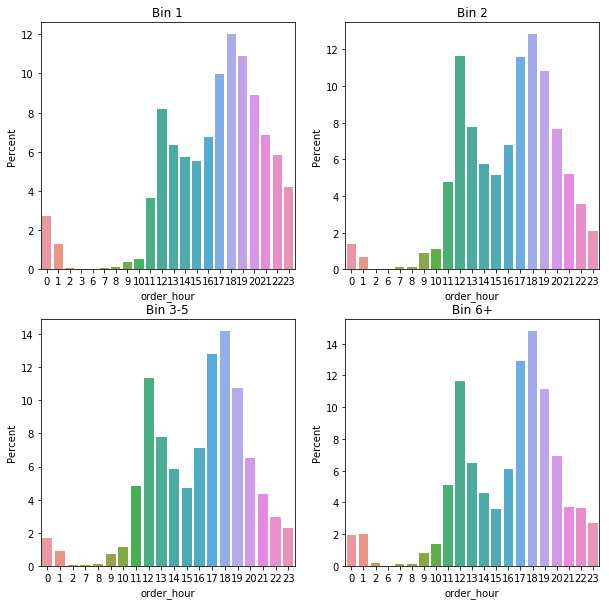

In [22]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.barplot(x='order_hour', y='order_hour', data=dfs[bin], estimator=lambda x: len(x) / len(dfs[bin]) * 100, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set(ylabel="Percent")

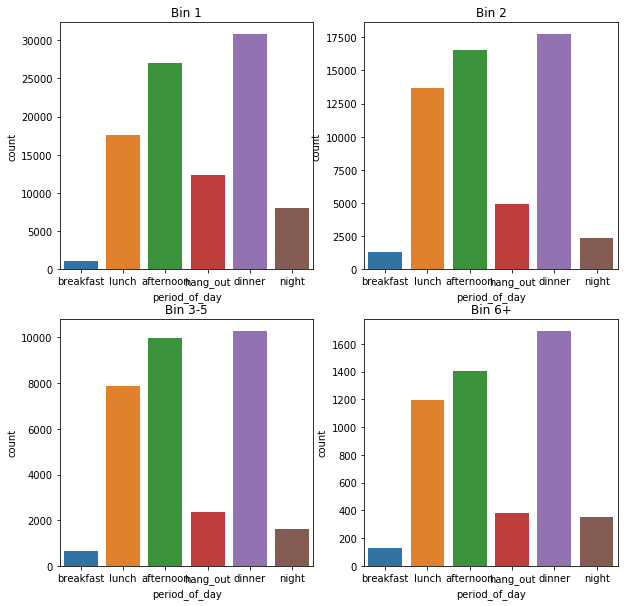

In [30]:
order = ['breakfast', 'lunch', 'afternoon', 'hang_out', 'dinner', 'night']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='period_of_day', data=dfs[bin], order=order, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

1 guest tables are more likely at *hang_out* / *night* times rather than at *lunch* compared to the other bins.

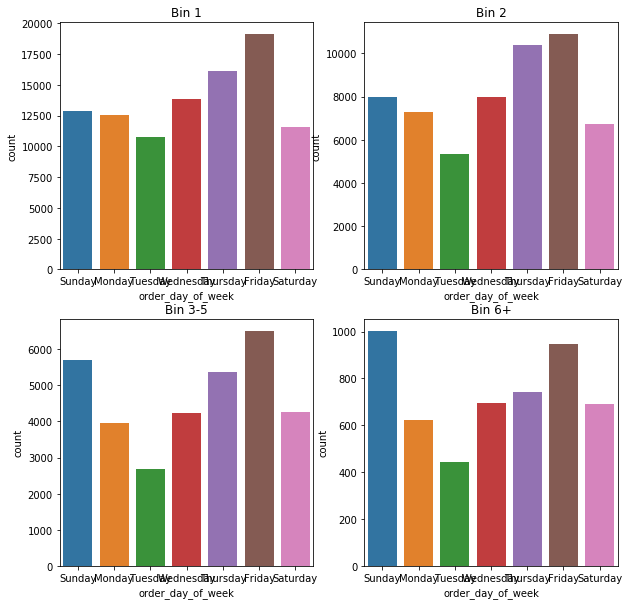

In [16]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='order_day_of_week', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

Tables of many guests (3+) are more likely on Sundays than during the weekdays.

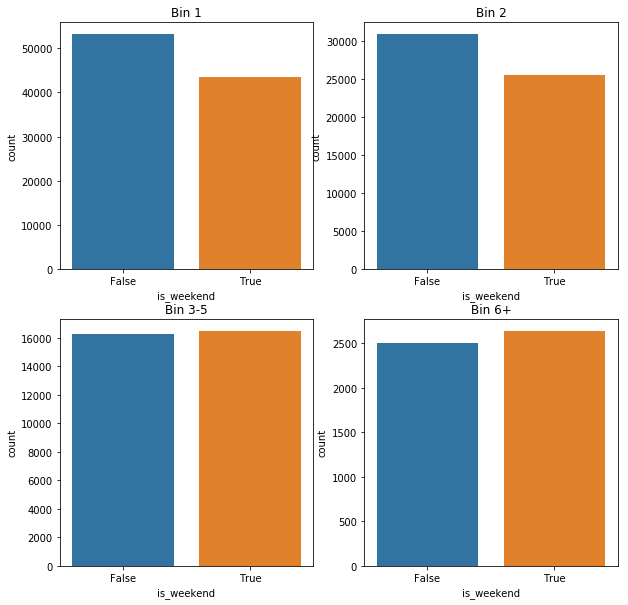

In [17]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='is_weekend', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

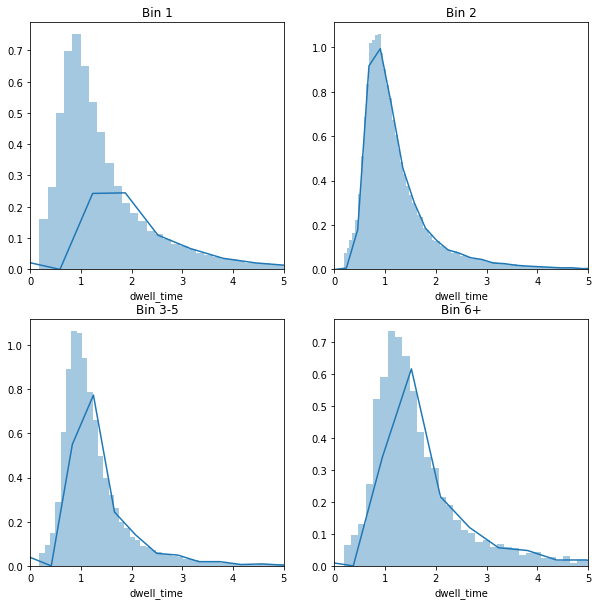

In [21]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(dfs[bin]['dwell_time'], bins=500, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 5)

#### 2. Counts (3 + 11 + 2 = 16)

- `item_qty`
- `beer_volume`
- `guest_count`


- `total_orders_category_id_1.0`
- `total_orders_category_id_2.0`
- `total_orders_category_id_3.0`
- `total_orders_category_id_4.0`
- `total_orders_category_id_5.0`
- `total_orders_category_id_6.0`
- `total_orders`
- `total_large_meals`
- `total_small_meals`
- `total_large_sharable_meals`
- `total_small_sharable_meals`


- `total_sales_before_tax`
- `total_sales_inc_tax`

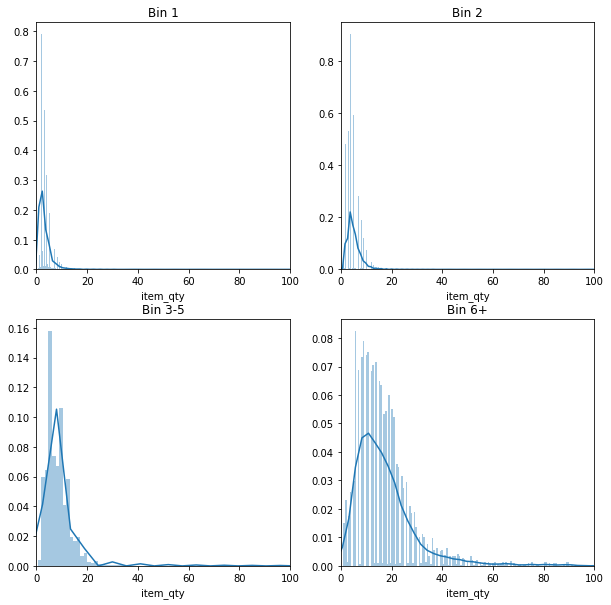

In [39]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(dfs[bin]['item_qty'], bins=500, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 100)

In [33]:
df.item_qty.value_counts(normalize=True)

 2.00      0.186166
 3.00      0.148227
 4.00      0.132953
 1.00      0.115034
 5.00      0.088860
 6.00      0.068967
 7.00      0.045931
 8.00      0.033866
 9.00      0.024738
 10.00     0.018494
 11.00     0.013899
 12.00     0.010900
 13.00     0.007947
 2.50      0.007442
 1.50      0.007253
 14.00     0.006326
 15.00     0.005337
 3.50      0.004267
 16.00     0.003992
 17.00     0.003085
 18.00     0.002461
 2.33      0.002404
 1.33      0.002306
 19.00     0.002121
 4.50      0.002068
 20.00     0.001854
 0.50      0.001477
 21.00     0.001469
 3.33      0.001452
 2.67      0.001436
             ...   
 317.00    0.000004
 13.86     0.000004
 2.64      0.000004
 2.84      0.000004
 4.52      0.000004
 17.35     0.000004
 17.40     0.000004
 2.78      0.000004
 30.01     0.000004
-8.00      0.000004
 2.54      0.000004
 18.33     0.000004
 4.36      0.000004
 63.34     0.000004
 4.30      0.000004
 11.00     0.000004
 1.90      0.000004
 22.60     0.000004
 12.00     0.000004


> 66% of the tables order 3-9 items

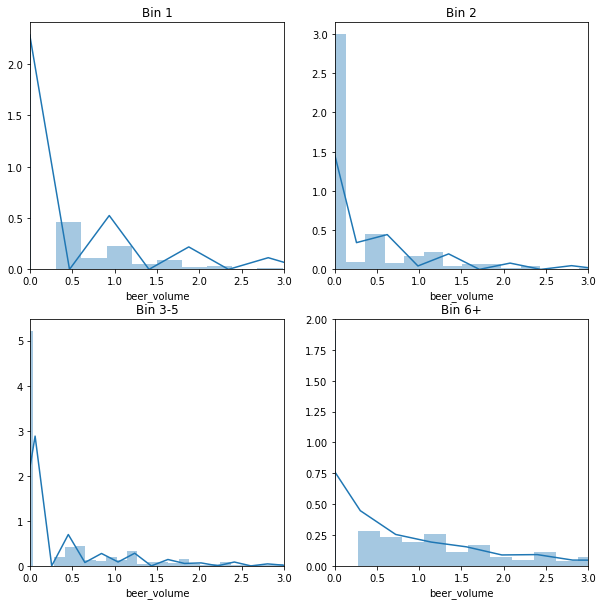

In [40]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(dfs[bin]['beer_volume'], bins=200, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 3)

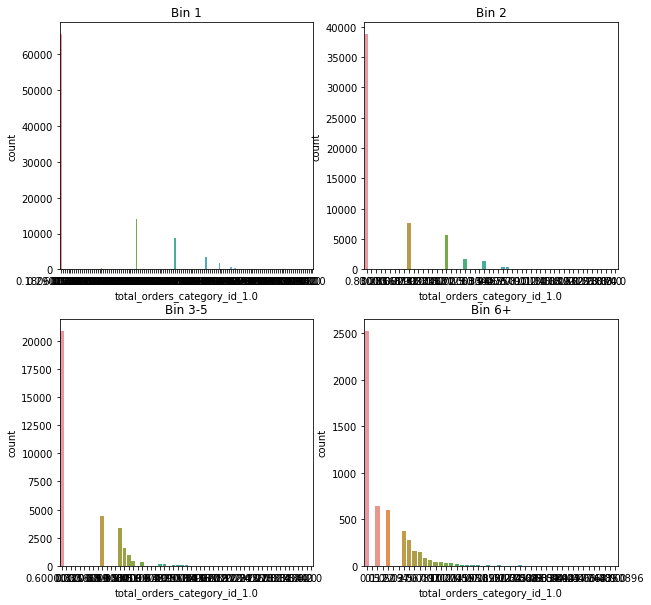

In [46]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_1.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

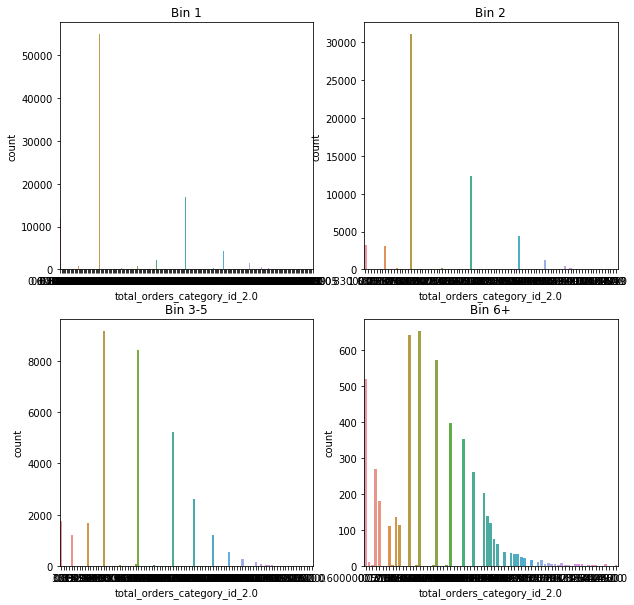

In [47]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_2.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

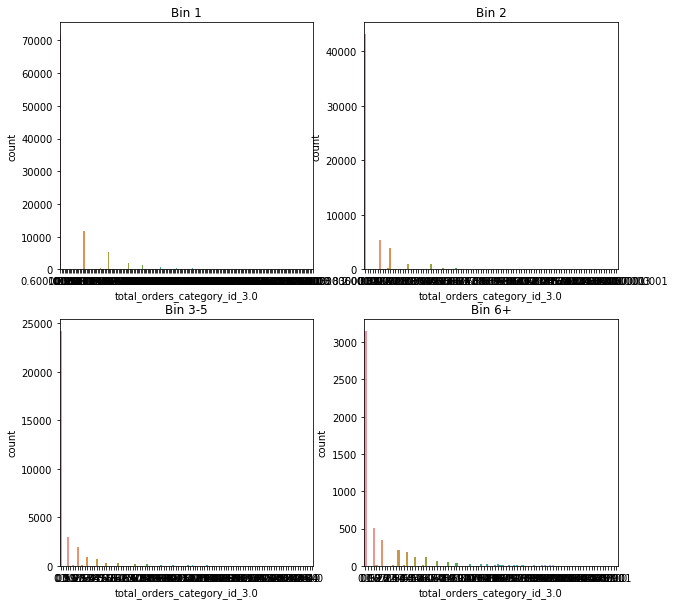

In [48]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_3.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

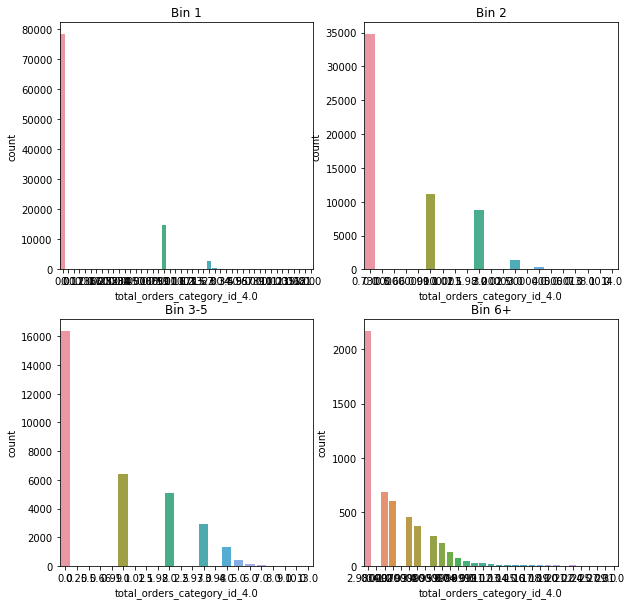

In [49]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_4.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

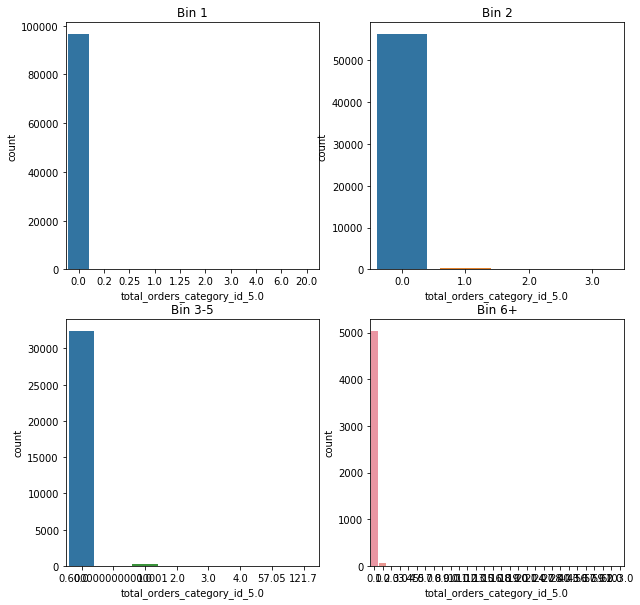

In [50]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_5.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

The explanation for the zeros is probably because most of this dishes are side-outs which cost 0 (filtered in the pre-processing phase).

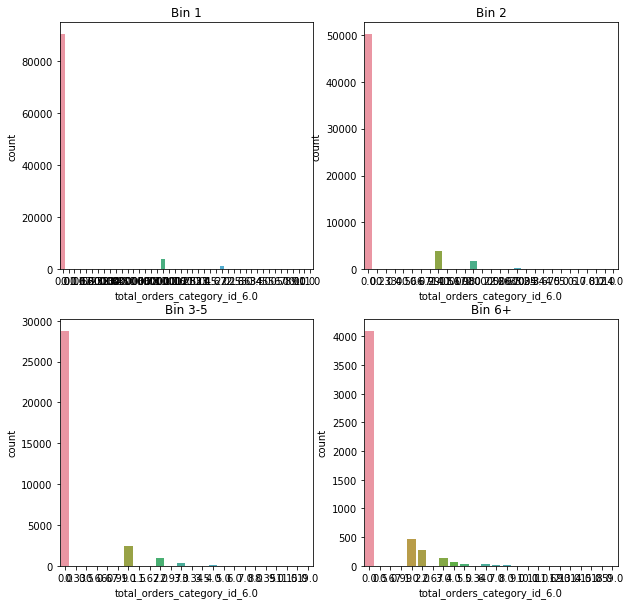

In [51]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders_category_id_6.0', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

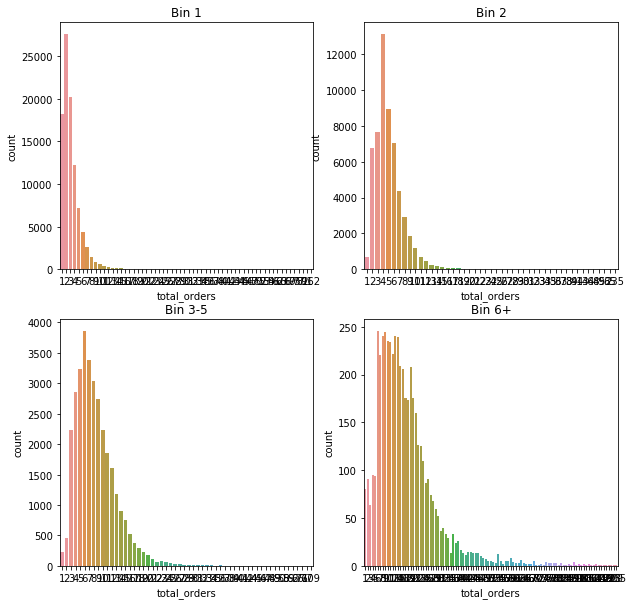

In [52]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_orders', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

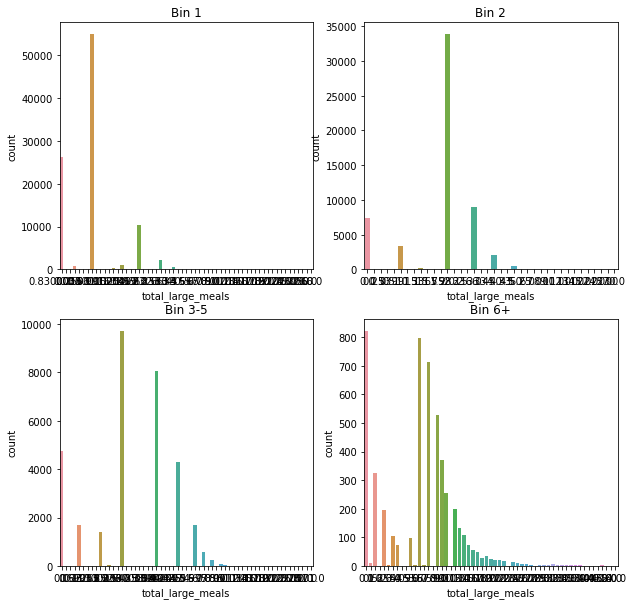

In [53]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_large_meals', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

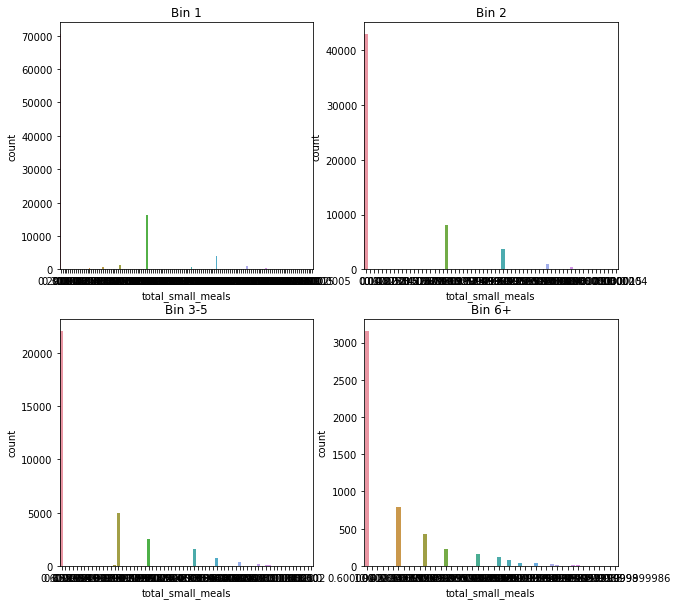

In [54]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_small_meals', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

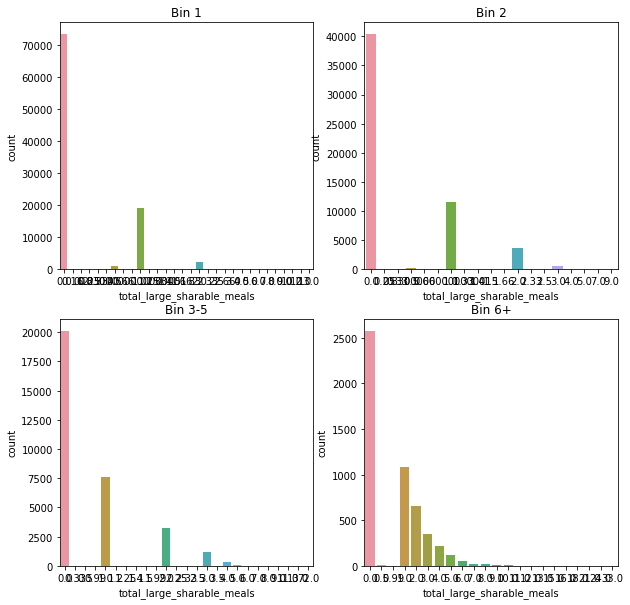

In [55]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_large_sharable_meals', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

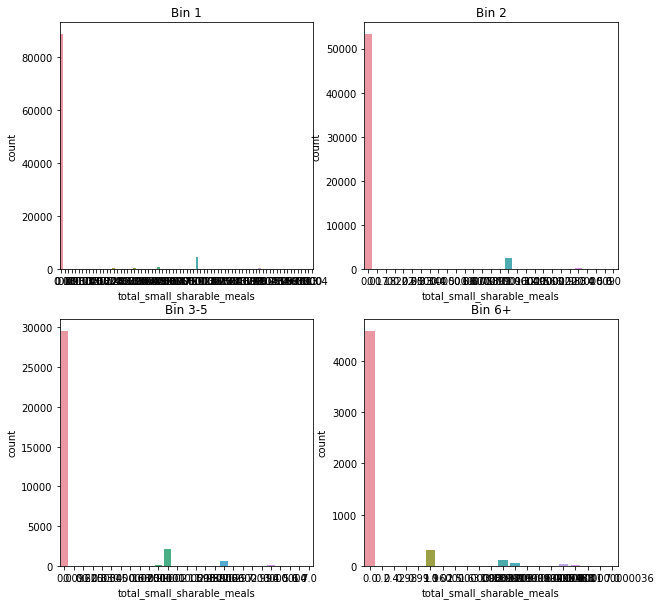

In [56]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='total_small_sharable_meals', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

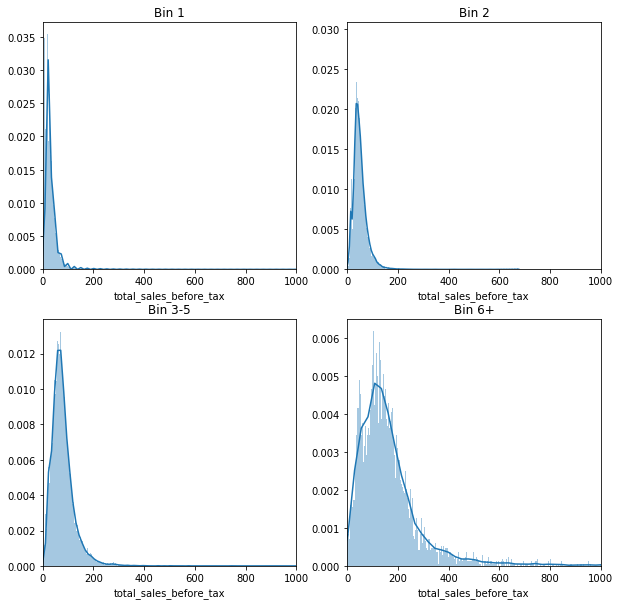

In [57]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(dfs[bin]['total_sales_before_tax'], bins=1000, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 1000)

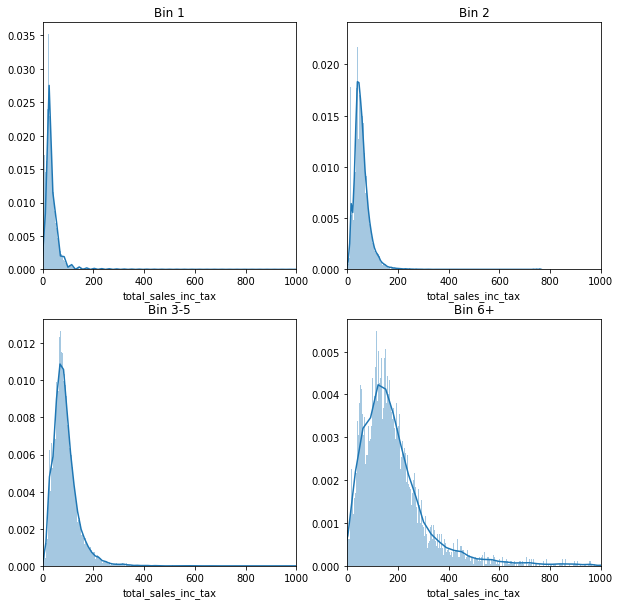

In [58]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.distplot(dfs[bin]['total_sales_inc_tax'], bins=1000, ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)
    axes[i].set_xlim(0, 1000)

#### 3. General (3)

- `sharable`
- `kids_meal`
- `birthday`

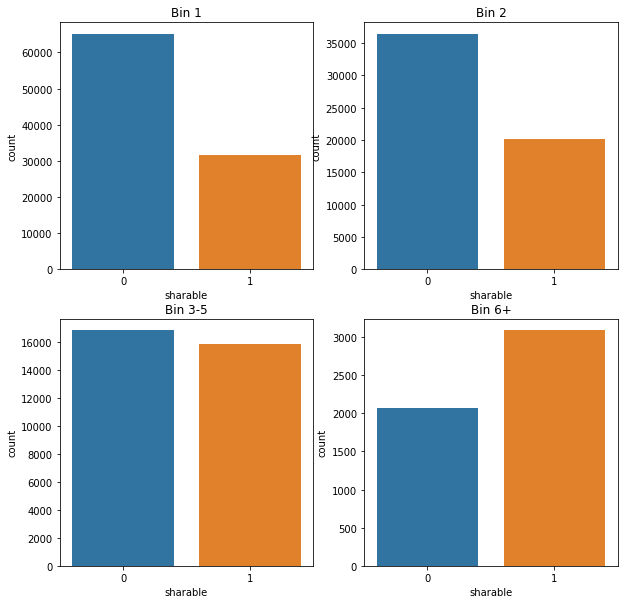

In [59]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='sharable', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

Tables of more guests tend to order more sharable dishes.

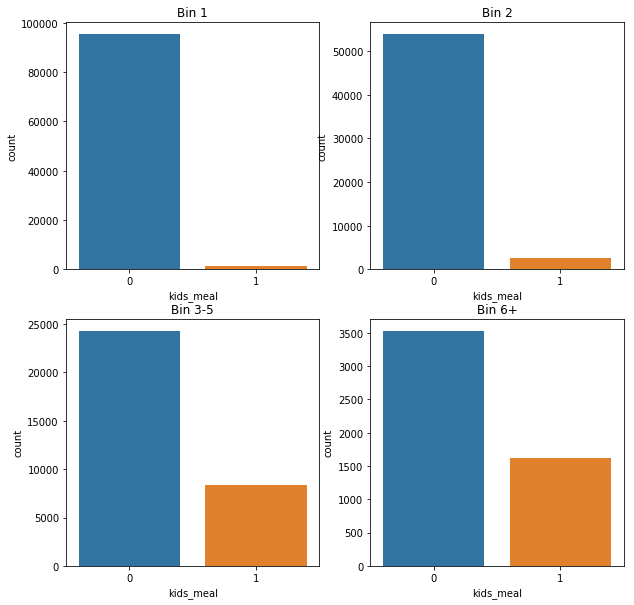

In [60]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='kids_meal', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

Kids usually arrive accompanied by big families (3+).

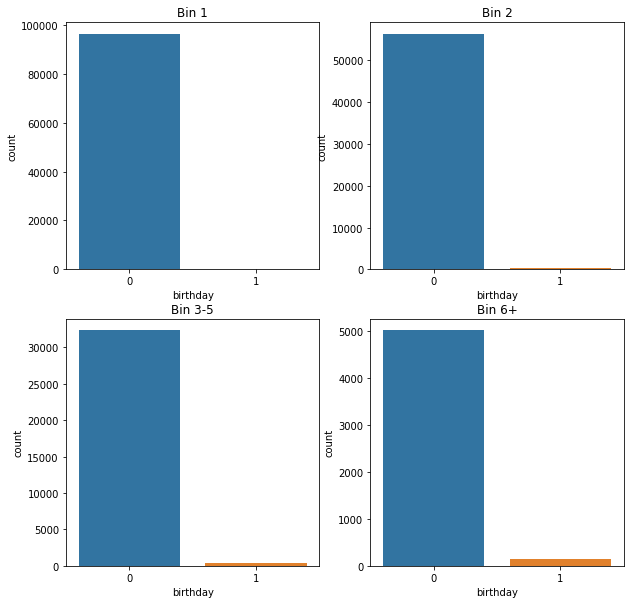

In [61]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(bins)):
    bin = bins[i]
    sns.countplot(x='birthday', data=dfs[bin], ax=axes[i])
    axes[i].title.set_text('Bin ' + bin)

Same for birthdays, more guests involved.

#### 4. Not Relevant (6)

- `meal_flow_last_to_close`
- `total_flow_steps`
- `total_meal_steps`
- `avg_time_between_steps`
- `sit_to_order`
- `max_items_per_step`